#**Comparison Of Deep Learning Models for Traffic Sign Detection**
    


#Importing Important Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Link to the DataSet 

In [ ]:
#Assiging the images to the directory

trafficdata="/content/drive/MyDrive/Project/testingtrafficnew"

In [ ]:
data_dir =trafficdata

#Data Understanding

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(trafficdata) #allows to load your data from directory

Found 10192 files belonging to 28 classes.


##Screenshot of Google Drive

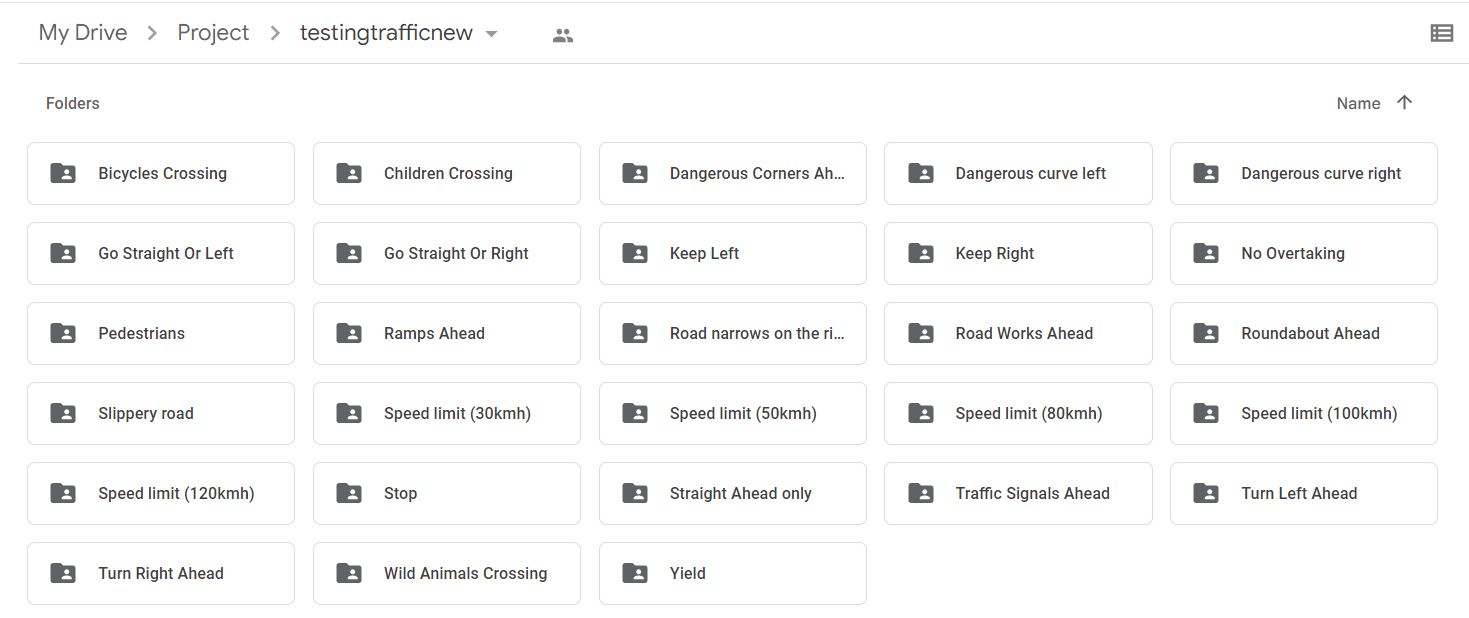

#Data Preparation

In [ ]:
#Resizing the image to desired size
batch_size = 32
img_height = 224
img_width = 224

#Data Splitting

In [ ]:
#Splitting the data into Training Data
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10192 files belonging to 28 classes.
Using 8154 files for training.


In [ ]:
#Splitting the data into Validation Data
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10192 files belonging to 28 classes.
Using 2038 files for validation.


#Displays the Names of Classes

In [ ]:
class_names = train_ds.class_names
print(class_names)

['Bicycles Crossing', 'Children Crossing', 'Dangerous Corners Ahead', 'Dangerous curve left', 'Dangerous curve right', 'Go Straight Or Left', 'Go Straight Or Right', 'Keep Left', 'Keep Right', 'No Overtaking', 'Pedestrians', 'Ramps Ahead', 'Road Works Ahead', 'Road narrows on the right', 'Roundabout Ahead', 'Slippery road', 'Speed limit (100kmh)', 'Speed limit (120kmh)', 'Speed limit (30kmh)', 'Speed limit (50kmh)', 'Speed limit (80kmh)', 'Stop', 'Straight Ahead only', 'Traffic Signals Ahead', 'Turn Left Ahead', 'Turn Right Ahead', 'Wild Animals Crossing', 'Yield']


#Data Visualization

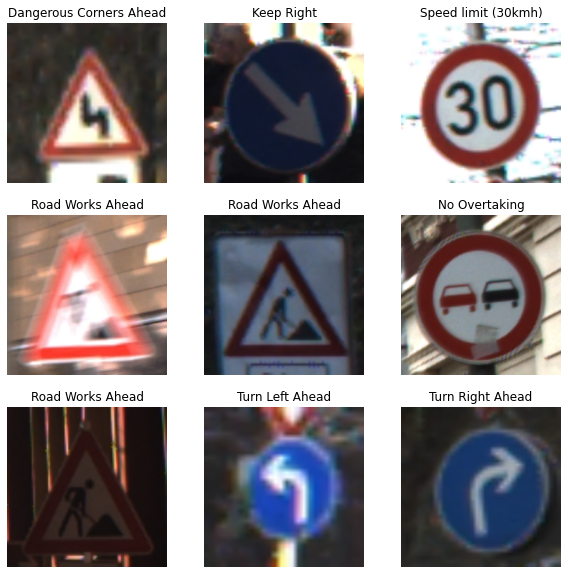

In [ ]:
#Plotting 9 images in the dataset randomly
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


#Model-1 VGG-16

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

_input = Input((224,224,3)) 

#Adding layers to the model

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

##Model Compilation

In [ ]:
# tell the model what cost and optimization method to use
vgg16_model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
  
)
# view the structure of the model
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                             

##Training the model for 10 Epochs

In [ ]:
epochs=10
history = vgg16_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
255/255 [==============================] - 4151s 16s/step - loss: 57.3968 - accuracy: 0.0487 - val_loss: 3.3362 - val_accuracy: 0.0520
Epoch 2/10
255/255 [==============================] - 125s 489ms/step - loss: 3.2844 - accuracy: 0.0603 - val_loss: 2.9534 - val_accuracy: 0.1119
Epoch 3/10
255/255 [==============================] - 127s 496ms/step - loss: 2.4417 - accuracy: 0.2288 - val_loss: 1.7174 - val_accuracy: 0.4534
Epoch 4/10
255/255 [==============================] - 127s 497ms/step - loss: 1.4042 - accuracy: 0.5226 - val_loss: 1.1879 - val_accuracy: 0.5839
Epoch 5/10
255/255 [==============================] - 127s 497ms/step - loss: 1.0123 - accuracy: 0.6430 - val_loss: 1.0152 - val_accuracy: 0.6536
Epoch 6/10
255/255 [==============================] - 127s 497ms/step - loss: 0.6382 - accuracy: 0.7843 - val_loss: 0.4036 - val_accuracy: 0.8670
Epoch 7/10
255/255 [==============================] - 127s 497ms/step - loss: 0.2690 - accuracy: 0.9110 - val_loss: 0.1838 -

##Plotting the Accuracy and Loss Graphs

Text(0.5, 1.0, 'Training and Validation Accuracy')

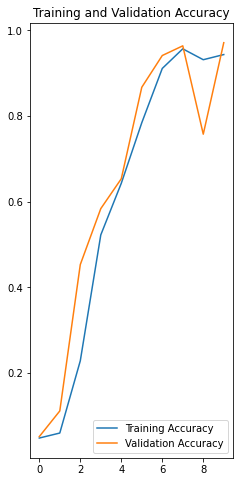

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


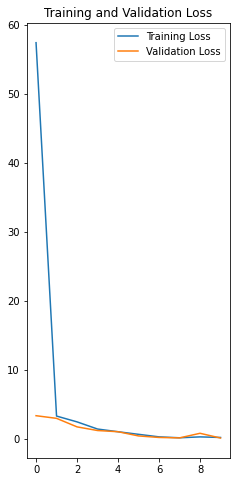

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#Model-2 ResNet 101

In [ ]:
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.layers import Activation

In [ ]:
convlayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

##Adding Layers to the model

In [ ]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(225, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_3 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 2048)              205522944 
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                      

##Compilation and Training the Model 

In [ ]:
opt=tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=opt)

#Training the model for 10 epochs

history=model.fit(train_ds,
                  validation_data=val_ds
                  ,epochs=10)

Epoch 1/10
255/255 [==============================] - 75s 270ms/step - loss: 2.4037 - accuracy: 0.4209 - val_loss: 0.9959 - val_accuracy: 0.7301
Epoch 2/10
255/255 [==============================] - 68s 267ms/step - loss: 1.0254 - accuracy: 0.6995 - val_loss: 0.7299 - val_accuracy: 0.8243
Epoch 3/10
255/255 [==============================] - 68s 268ms/step - loss: 0.6728 - accuracy: 0.8087 - val_loss: 0.6882 - val_accuracy: 0.8567
Epoch 4/10
255/255 [==============================] - 69s 269ms/step - loss: 0.4498 - accuracy: 0.8743 - val_loss: 0.6837 - val_accuracy: 0.8729
Epoch 5/10
255/255 [==============================] - 69s 269ms/step - loss: 0.3394 - accuracy: 0.9065 - val_loss: 0.6471 - val_accuracy: 0.8916
Epoch 6/10
255/255 [==============================] - 69s 270ms/step - loss: 0.2534 - accuracy: 0.9300 - val_loss: 0.6193 - val_accuracy: 0.9156
Epoch 7/10
255/255 [==============================] - 69s 270ms/step - loss: 0.2065 - accuracy: 0.9443 - val_loss: 0.6023 - val_ac

##Plotting the Accuracy and Loss Graphs

Text(0.5, 1.0, 'Training and Validation Accuracy')

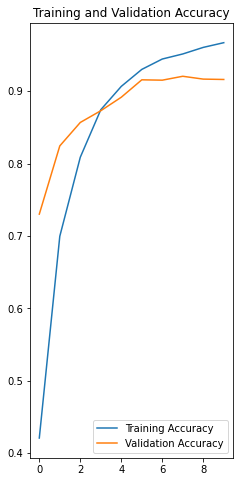

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


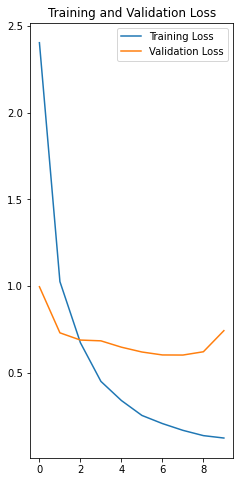

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#Comparison of Two Models

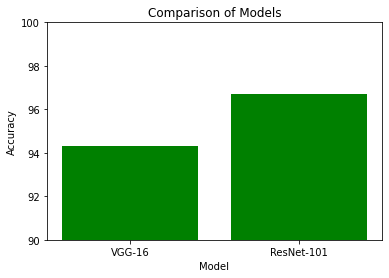

In [ ]:
import matplotlib.pyplot as plt
  
# x-coordinates of left sides of bars 
left = [1, 2]
  
# heights of bars
height = [94.33, 96.69]
  
# labels for bars
tick_label = ['VGG-16', 'ResNet-101']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['green', 'green'])
  
# naming the x-axis
plt.xlabel('Model')

# naming the y-axis
plt.ylabel('Accuracy')

# plot title
plt.title('Comparison of Models')

plt.ylim(90,100)

# function to show the plot
plt.show()